[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/makennajohnstone/Lab6/blob/master/Assignment_2.ipynb)

# Assignment 2

## Printed copy due in class on October 15, 2018

You may work in pairs on this assignment. You are not permitted to discuss this assignment with anyone other than your partner or the instructors.

## Student 1: Likhita Narayana
## Student 2: Anna Rulloda

## Question 1: Maximum Likelihood

The Weibull distribution is widely used to model failure times. Its p.d.f. is 

$$ p(x) = \frac{\beta}{\alpha} \left( \frac{x}{\alpha} \right)^{\beta - 1} e^{-\left(\frac{x}{\alpha}\right)^\beta}. $$

The data in `/data400/test_coupons_failure.csv` contain the cycles to failure of aluminum test coupons subjected to repeated alternating stress of 15,000 psi at 20 cycles per second. In this question, you will use the Weibull distribution to model this data.

For some parts, you will be able to calculate the maximum likelihood analytically (i.e., by taking the derivative and setting it equal to 0). You should show your work in this case. (I encourage you to typeset math equations using LaTeX. The p.d.f. above was typeset using LaTeX, for example.) For others, you will calculate the maximum likelihood numerically. You should show your code in this case.

In [0]:
import pandas as pd
#cycles = pd.read_csv("/data400/test_coupons_failure.csv")["cycles"]
cycles = [8078,1891,13912,3407,6168,15504,1893,12551,6861,1334,9438,6227,2562,2074,6770,7971,17081,9245,19041,21997]
sumCycles = sum(cycles)
avgCycles = sumCycles/len(cycles)
print(avgCycles)

8700.25


### Part A. Unknown $\alpha$

Suppose you want to model the distribution by a Weibull where $\beta=2.0$. Find the maximum likelihood estimate (MLE) of $\alpha$.

In [0]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

def likelihood_alpha(a, x):
    return (2/a)*(x*1.0/a)**(2-1) * np.exp((x*1.0/a) ** 2)

# Define the negative likelihood
def neg_likelihood_alpha(a, x):
    return -(2/a)*(x*1.0/a)**(2-1) * np.exp((x*1.0/a) ** 2) 

def neg_log_likelihood_alpha(a, x=8700.25):
    #print("a = {} and x = {}".format(a, x))
    return -1 * (np.log(2) - np.log(a) + (2 - 1)*(np.log(x) - np.log(a)) - ((x/a)**2))
  

minimize(neg_log_likelihood_alpha, 1)

      fun: 9.378057289080559
 hess_inv: array([[13768812.59312459]])
      jac: array([-3.09944153e-06])
  message: 'Optimization terminated successfully.'
     nfev: 144
      nit: 47
     njev: 48
   status: 0
  success: True
        x: array([8639.87708318])

### Part B. Unknown $\beta$

Suppose you want to model the distribution by a Weibull where $\alpha=8000$. Find the MLE of $\beta$.

In [0]:
def neg_log_likelihood_beta(b):
    return -1 * (np.log(b) - np.log(8000) + (b - 1)*(np.log(8700.25) - np.log(8000)) - ((8700.25/8000)**b))
      
      
minimize(neg_log_likelihood_beta, .1)

      fun: 8.241704609433187
 hess_inv: array([[37.45622023]])
      jac: array([-5.96046448e-07])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 9
     njev: 11
   status: 0
  success: True
        x: array([9.61103269])

### Part C. Unknown $\alpha$ and $\beta$

Suppose you are unsure what either $\alpha$ or $\beta$ should be, so you would like to learn both parameters from data. Find the MLE of $(\alpha, \beta)$.

In [0]:
def neg_log_likelihood_alpha_beta(ab):
    a,b = ab
    #print("a = {}, b = {}".format(a, b))
    return -1 * (np.log(b) - np.log(a) + (b - 1)*(np.log(8700.25) - np.log(a)) - ((8700.25/a)**b))
  
  
#Define the negative likelihood
def neg_likelihood_alpha_beta(ab):
  a,b = ab
  #print("a = {}, b = {}".format(a,b))
  return -(b*1.0/a)*(8700.25/a)**(b-1) * np.exp((8700.25/a) ** b) 
      

init_guess = [1,1]
print("Unknown alpha and beta using negative log likelihood function")
minimize(neg_log_likelihood_alpha_beta, init_guess)

Unknown alpha and beta using negative log likelihood function


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


      fun: nan
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 448
      nit: 1
     njev: 112
   status: 2
  success: False
        x: array([  114.32960707, -1027.01205137])

In [0]:
init_guess_2 = [.1,.1]
print("Unknown alpha and beta using negative likelihood function")
minimize(neg_likelihood_alpha_beta, init_guess_2)

Unknown alpha and beta using negative likelihood function


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalar

      fun: nan
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 172
      nit: 1
     njev: 43
   status: 2
  success: False
        x: array([-3.31850749, 47.28134193])

### Part D. Plot your results

Make a histogram of the coupon cycles data. You learned three different Weibull distributions in Parts A-C above. Show the p.d.f.s of these three distributions on top of the histograms. Which p.d.f. seems to fit the data the best?

In [0]:
def weibull(a, b, x):
    return (b*1.0/a)*(x*1.0/a)**(b-1) * np.exp((x*1.0/a)**b)

In [0]:
unknown_alpha_histogram_cycles = []
unknown_beta_histogram_cycles = []
unknown_alpha_beta_histogram_cycles = []

for i in cycles:
  #print("i = {}".format(i))
  unknown_alpha_histogram_cycles.append(weibull(8639.87708318, 2.0, i))
  unknown_beta_histogram_cycles.append(weibull(8000, 9.61103269, i))
  unknown_alpha_beta_histogram_cycles.append(weibull(47.28134193,3.31850749, i))

print("unknown_alpha_histogram_cycles = {}".format(unknown_alpha_histogram_cycles))
print("unknown_beta_histogram_cycles = {}".format(unknown_beta_histogram_cycles))
print("unknown_alpha_beta_histogram_cycles = {}".format(unknown_alpha_beta_histogram_cycles))

unknown_alpha_histogram_cycles = [0.000518755858333301, 5.3150903952468276e-05, 0.004982303564395124, 0.00010663986785663247, 0.0002751048313744785, 0.010397766347830238, 5.321251313350473e-05, 0.002774464759475535, 0.0003453599794282105, 3.6603620673643214e-05, 0.000833935940752901, 0.0002804706404880341, 7.495179514043316e-05, 5.8863942457460044e-05, 0.0003351633827953264, 0.000500243159978609, 0.022802023291798024, 0.0007783612339424326, 0.06562281037868654, 0.38502861965617263]
unknown_beta_histogram_cycles = [0.0039147882461654845, 4.850012766561699e-09, 5.2962249889294535e+87, 7.718542665302634e-07, 0.0001389210650950359, 3.041367312697741e+250, 4.89436194598249e-09, 4.940678488146441e+31, 0.0004022962282790148, 2.403607894622127e-10, 0.6680828882542612, 0.00015198046565726185, 6.628855419455278e-08, 1.0744697541561236e-08, 0.00034886733538653424, 0.0030584162856783707, inf, 0.23146845539184685, inf, inf]
unknown_alpha_beta_histogram_cycles = [inf, inf, inf, inf, inf, inf, inf, i

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


(array([18.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([3.66036207e-05, 3.85358052e-02, 7.70350068e-02, 1.15534208e-01,
        1.54033410e-01, 1.92532612e-01, 2.31031813e-01, 2.69531015e-01,
        3.08030216e-01, 3.46529418e-01, 3.85028620e-01]),
 <a list of 10 Patch objects>)

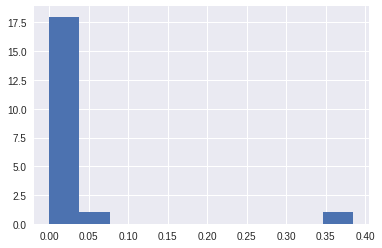

In [0]:
plt.hist(unknown_alpha_histogram_cycles)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True False False]


(array([ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

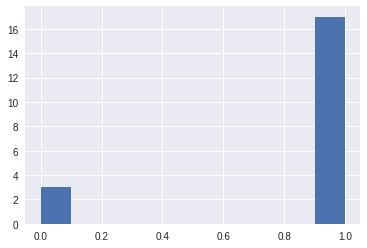

In [0]:
import numpy as np
unknown_beta_histogram_cycles = np.isfinite(unknown_beta_histogram_cycles)
print(unknown_beta_histogram_cycles)
plt.hist(unknown_beta_histogram_cycles)

## Question 2: Simple Linear Regression with Intercept

In this class, you will explore the simple linear regression model (with intercept). That is, we assume that the labels $Y_i$ are independently generated according to 
$$Y_i = \beta_0 + \beta_1 x_i + \epsilon_i,$$

where the feature $x_i$ is assumed to be fixed and $\epsilon_i$ is $\textrm{Normal}(0, \sigma^2)$. 

In other words, we assume that the distribution of $Y_i$ is $\text{Normal}(\beta_0 + \beta_1 x_i, \sigma^2)$, and $Y_1, ..., Y_n$ are independent (but not identically distributed).

### Part A. Deriving the MLE from Scratch

Use calculus to find $\hat\beta_0$, $\hat\beta_1$, and $\hat\sigma^2$ (the MLEs of $\beta_0$, $\beta_1$, and $\sigma^2$) in terms of $(x_1, Y_1), ..., (x_n, Y_n)$.

$$ L(\beta_0, \beta_1, \sigma^2) = \prod_{i=1}^{n}\frac{1}{{ \sqrt {2\pi \sigma^2} }} e^-(yi-(\beta_0 + \beta_1x_i))^2 /{2\sigma ^2 }$$








$$ logL(\beta_0, \beta_1, \sigma^2) = \frac {-n}{2}log2\pi - \frac {n}{2}log2\sigma^2 -  \frac {1}{2\sigma^2} \sum_{i=1} (y_i-(\beta_0 + \beta_1x_i))^2$$





 $$  \frac{\partial logL}{\partial \beta_0}= \frac {1}{\sigma^2} \sum_{i=1} (y_i-(\beta_0 + \beta_1x_i) $$

 $$  \frac{\partial logL}{\partial \beta_1}= \frac {1}{\sigma^2} \sum_{i=1} x_i(y_i- (\beta_0 + \beta_1x_i)) $$


 $$  \frac{\partial logL}{\partial \sigma^2}= \frac {1}{2(\sigma^2)^2} \sum_{i=1} (y_i- (\beta_0 + \beta_1x_i))^2 - \frac{n}{2\sigma^2} $$


$$ \beta0 = \frac{\sum_{i=1}y_{i} - \beta1\sum_{i=1}x_{i}}{n} = \bar{y} - \beta1\bar{x}  $$ 

$$ \sum_{i = 1}x_{i}y_{i} - \beta0\sum_{i = 1}x_{i} - \sum_{i=1} \beta1xi^2 = 0 $$

$$ \sum_{i = 1}x_{i}y_{i} - (\bar{y} - \bar{\beta1}\bar{x})\sum_{i = 1}x_{i} - \sum_{i=1} \beta1xi^2 = 0 $$

### Part B. Deriving the MLE from the Multiple Regression Formula

In class, we showed that for multiple linear regression, the _vector_ $\hat\beta$ of estimated coefficients is given by the formula
$$\hat\beta = (X^T X)^{-1} X^T {\bf y},$$
where $X$ is an $n \times d$ matrix of features and ${\bf y}$ is a length-$n$ vector of labels.

By constructing a suitable matrix $X$ for simple linear regression, re-derive the simple linear regression estimates $\hat\beta_0$ and $\hat\beta_1$ using the multiple regression formula above.

$$ Y_i = \beta_0 + \beta_1X_i + \epsilon_i$$ $
where $ i = 1,..., n$$

$$Y_1 = \beta_0 + \beta_1X_1 + \epsilon_1 $$
$$Y_2 = \beta_0 + \beta_1X_2 + \epsilon_2 $$
...
$$Y_n = \beta_0 + \beta_1X_n + \epsilon_n $$

Y is a n by 1 matrix. X is a n by 2 matrix with the first column being all ones. B is a 2 by 1 matrix. E is a n by 1 matrix. 


$$ \begin{bmatrix}
    Y_{1}       \\
    Y_{2}       \\
    ... \\
    Y_{n}       
\end{bmatrix}
= Y (n x 1 matrix)$$


$$ \begin{bmatrix}
    1 & X_{1}       \\
    1 & X_{2}       \\
    ... \\
    1 & X_{n}       
\end{bmatrix}
= X (n x 2 matrix)$$


$$ \begin{bmatrix}
    \beta_{0}       \\
    \beta_{1}       
\end{bmatrix}
= \beta (2 x 1 matrix)$$

$$ \begin{bmatrix}
    \epsilon_{1}       \\
    \epsilon_{2}       \\
    ... \\
    \epsilon_{n}       
\end{bmatrix}
= \epsilon (n x 1 matrix)$$


The simple linear regression formula can be expressed as below in matrix form:
$$ Y = X\beta + \epsilon$$

Both beta values can be found using this formula:

$$ \frac{1}{\sigma^2}\sum_{i=1}^n (y_i - x_i^T \beta)x_{ij} = 0$$
$$ \frac{1}{\sigma^2}\sum_{i=1}^n (y_i - x_i^T \beta)1 = 0$$
$$ X^T(Y - X\beta) = 0$$
$$ X^T - X^TX\beta = 0$$
$$ X^T - X\beta = X^TY$$
$$\beta = (X^TX)^-1 (X^TY)$$


## Submission Instructions

Once you are finished with this assignment, please export this notebook to PDF. You can do this by going to `File > Export Notebook As > PDF`. If this does not work, try exporting to HTML and then printing the resulting webpage to PDF. Print out the PDF and submit a paper copy of this assignment.